In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from implementations import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Load and clean the training data**

We load the training data.

In [4]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("../data")

print(f"The data has {x_train.shape[0]} samples and {x_train.shape[1]} features !")

The data has 328135 samples and 321 features !


For each feature, we clean the data so the values make more sense

In [5]:
#TODO : clean the data by calling the associated function in the implementations.py
x_train[:,6] = replace(x_train[:,6], [1100,1200], [1,0])
x_train[:,13] = replace(x_train[:,13], [0,1], [1,2])
x_train[:,24] = replace(x_train[:,24], [1,2,7,9], [0,1,np.nan,np.nan])
x_train[:,25] = replace(x_train[:,25], [77,99], [np.nan,np.nan])
x_train[:,26] = replace(x_train[:,26], [2,3,4,5,7,9], [0.75,0.5,0.25,0,np.nan,np.nan])

array_1 = [27,28,29]

for i in array_1 : 
    x_train[:,i] = replace(x_train[:,i], [88,77,99], [np.nan,np.nan,np.nan])

x_train[:,31] = replace(x_train[:,31], [3,7,9], [0,np.nan,np.nan])

array_2 = [30,32,34,35,36,38,39,40,41,42,43,44,45,46,47,48,53,54,55,56,57,61,64,65,66,67,68,69,70,71,72,73,74,87,95,96,100,103,104,107,108,116,117,118]
           
for i in array_2:
    x_train[:,i] = replace(x_train[:,i], [7,9], [np.nan,np.nan])
    

x_train[:,33] = replace(x_train[:,33], [1,2,3,4,7,8,9], [6,18,42,60,np.nan,120,np.nan])
x_train[:,37] = replace(x_train[:,37], [1,2,3,4,7,9], [6,18,42,60,np.nan,np.nan])
x_train[:,49] = replace(x_train[:,49], [98,99], [np.nan,np.nan])

array_3 = [51,52,58]

for i in array_3 : 
    x_train[:,i] = replace(x_train[:,i], [9], [np.nan])
    
x_train[:,59] = replace(x_train[:,59], [88,99], [0,np.nan])
x_train[:,60] = replace(x_train[:,60], [1,2,3,4,5,6,7,8,77,99] , [5,12.5,17.5,22.5,30,42.5,62.5,75,np.nan,np.nan])

x_train[:,62] = replace(x_train[:,62], [7777,9999], [np.nan,np.nan])    
x_train[:,62] = list(map(IntoPounds,(x_train[:, 62])))

x_train[:,63] = replace(x_train[:,63], [7777,9999], [np.nan,np.nan])    
x_train[:,63] = list(map(IntoInches,(x_train[:, 63])))

x_train[:,75] = replace(x_train[:,75],[1,2,3,4,5,6,7,8,77,99] , [15,60,135,270,1080,2070,3600,np.nan,np.nan,np.nan])
x_train[:,76] = replace(x_train[:,76],[3,7,9] ,[0,np.nan,np.nan])
x_train[:,77] = replace(x_train[:,77],[777,888,999] ,[np.nan,0,np.nan])
x_train[:,77] = list(map(WeekToMonth,(x_train[:, 77])))


array_5 = [78,80,88,91,98,119]

for i in array_5 :
    x_train[:,i] = replace(x_train[:,i], [77,99], [np.nan,np.nan])
    
x_train[:,79] = replace(x_train[:,79],[77,88,99] ,[np.nan,0,np.nan])

array_6 = [81,82,83,84,85,86]

for i in array_6 :
    x_train[:,i] = replace(x_train[:,i], [300,555,777,999], [0,0,np.nan,np.nan])
    x_train[:,i] = list(map(DayToMonth,(x_train[:, i])))
    
array_7 = [89,90,92,93] 

for i in array_7 :
    x_train[:,i] = replace(x_train[:,i], [777,999],  [0,0,np.nan,np.nan])

x_train[:,89] = list(map(WeekToMonth,(x_train[:, 89])))
x_train[:,90] = list(map(HourToMinutes,(x_train[:, 90])))
x_train[:,92] = list(map(HourToMinutes,(x_train[:, 92])))

array_8 = [94,110,111] 

for i in array_8 :
    x_train[:,i] = replace(x_train[:,i], [777,888,999], [np.nan,0,np.nan])

x_train[:,94] = replace(x_train[:,94], [777,888,999], [np.nan,0,np.nan])
x_train[:,94] = list(map(WeekToMonth,(x_train[:, 94])))
x_train[:,97] = replace(x_train[:,97], [2,3,7,9], [0.5,0,np.nan,np.nan])
x_train[:,99] = replace(x_train[:,99], [2,3,4,5,7,8,9], [0.75,0.5,0.25,0,np.nan,np.nan,np.nan])
x_train[:,101] = replace(x_train[:,101], [777777, 999999],  [np.nan,np.nan])

#x_train[:,101] = list(map(DateType,(x_train[:, 101])))

x_train[:,105] = replace(x_train[:,105], [777777, 999999],  [np.nan,np.nan])
#x_train[:,105] = list(map(DateType,(x_train[:, 105])))

x_train[:,110] = list(map(DayToYear,(x_train[:, 110])))
x_train[:,111] = list(map(DayToYear,(x_train[:, 111])))

x_train[:,113] = replace(x_train[:,113],[77,88,98,99] ,[np.nan,0,np.nan,np.nan])
x_train[:,114] = replace(x_train[:,114],[77,88,99] ,[np.nan,0,np.nan])
x_train[:,115] = replace(x_train[:,114],[1,2,3,4,7,8,9] ,[15,180,540,720,np.nan,0,np.nan])

In [6]:
#data_copy = x_train
#Replace nan by mean of the col

def nan_to_mean(x):
    nan_indices = np.isnan(x)
    non_nan_indices = ~nan_indices  # Invert the nan_indices to get non-NaN indices
    mean_x = np.mean(x[non_nan_indices])
    x[nan_indices] = mean_x

def nan_to_zero(x):
    nan_indices = np.isnan(x)
    non_nan_indices = ~nan_indices  # Invert the nan_indices to get non-NaN indices
    mean_x = np.mean(x[non_nan_indices])
    x[nan_indices] = 0


# Replacing all the columns that have  [7,9,np.nan] =>  [np.nan,np.nan,np.mean(data[:, col_number])]

cols = [120,121,137,138,139,140,162,166,171,173,175,178,180,183,188,204,205]

#put 7,9 to nan
old = [7,9]
new = [np.nan,np.nan]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])


np.unique(x_train[:,137])
# Replacing all the columns that have   [np.nan,7,9] => [0,0,0] 
cols = [123,124,126,136,141,142,144]
my_list = [i for i in range(155, 162)]
cols.extend(my_list)
my_list = [163,164,165,169,170,172,174,176,177,179,181,182,184,185,186,187,189,191,194,196,198,199,201,202,203,214,215]
cols.extend(my_list)

old = [np.nan,7,9]
new = [0,0,0]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)

for col in cols: 
    nan_to_zero(x_train[:,col])

# Replacing all the columns that have [np.nan,77,99] => [0,0,0]
cols = [122,224,225,239]

old = [77,99]
new = [0,0]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_zero(x_train[:,col])
# Replacing all the columns that have  [88,77,99,np.nan] => [0,np.nan,np.nan,np.mean(data[:,mean])]

cols = []
my_list = [i for i in range(206, 214)]
cols.extend(my_list)

old = [88,77,99]
new = [0,np.nan,np.nan]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])
cols = [133,134,135,146]
old = [7]
new = [0]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_zero(x_train[:,col])
cols = []
my_list = [i for i in range(216, 223)]
cols.extend(my_list)
my_list = [i for i in range(226, 230)]
cols.extend(my_list)
cols.extend([238])


for col in cols: 
    nan_to_zero(x_train[:,col])

# [np.nan,9] => [0,0]
cols = [200,223]
my_list = [i for i in range(230, 238)]
cols.extend(my_list)

old = [9]
new = [0]

for col in cols: 

    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_zero(x_train[:,col])

cols = [125]

old = [7,8]
new = [np.nan,np.nan]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])


##########################
cols = [127]

old = [7,8]
new = [0,0]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_zero(x_train[:,col])

########################
cols = [128]

old = [7]
new = [np.nan]
for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])


#####################
cols = [129]

old = [5,7,9]
new = [0,np.nan,np.nan]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])

##########################

cols = [130]

old = [8,77,99]
new = [0,0,0]
for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_zero(x_train[:,col])

#########################
cols = [131]

old = [5,8,9]
new = [0,np.nan,np.nan]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])

###############################

cols = [132]

old = [7,8,9]
new = [0,0,0]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_zero(x_train[:,col])

########################################

cols = [132]

old = [7,8,9]
new = [0,0,0]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_zero(x_train[:,col])


############################################                    

cols = [145]

old = [97,98,99]
new = [5,np.nan,np.nan]


for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])

########################################

cols = [147,148]

old = [88,98]
new = [0, np.nan]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])

####################################

cols =[149]

old = [88,98,99]
new = [0, np.nan, np.nan]
for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])

##############################
cols = [150]

old =  [888,777,999]
new =  [0,np.nan,np.nan]
for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])
######################################
cols = [151,153,154]

old = [8,7,9]
new = [0,np.nan,np.nan]
for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])

###################################

cols = [152]

old = [8,7]
new =  [0,np.nan]
for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])

###########################

cols = [167]
old = [3,7,9]
new = [0,0,0]
for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_zero(x_train[:,col])

#######################
cols = [168]
old = [77,99]
new = [np.nan,np.nan]
for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])

######################
cols = [190]
old = [4,9]
new = [0,0]
for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_zero(x_train[:,col])

################
cols = [192,193]
old = [7,9,8]
new = [np.nan,np.nan,np.nan]
for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])

####################
cols = [195,197]
old = [97,98,99]
new = [np.nan,0,np.nan]
for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_mean(x_train[:,col])

####################### 


# For col 143 LONGWTCH format time in days 
def convert_to_days(x):
    x = np.where((x >= 100) & (x < 200), x-100,x)
    x =  np.where((x >= 200) & (x < 300), (x-200)*7,x)
    x =  np.where((x >= 300) & (x < 400), (x-300)*12,x)
    x =  np.where((x >= 400) & (x < 500), (x-400)*365,x)

    return x
x = np.array([1,3,5,101.0,108.0,204.0,301])
x= convert_to_days(x)
print(x)
old = [555,777,999]
new = [0,0,0]

for col in cols: 
    x_train[:,col] = replace(x_train[:,col], old,new)
    nan_to_zero(x_train[:,col])

x_train[:,143] = convert_to_days(x_train[:,143])


print(x_train[:,143])
np.unique(x_train[:,143])



[ 1.  3.  5.  1.  8. 28. 12.]
[nan nan nan ... nan nan nan]


array([1.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00,
       6.0000e+00, 7.0000e+00, 8.0000e+00, 1.0000e+01, 1.1000e+01,
       1.2000e+01, 1.4000e+01, 1.5000e+01, 1.7000e+01, 2.0000e+01,
       2.1000e+01, 2.4000e+01, 2.5000e+01, 2.8000e+01, 2.9000e+01,
       3.0000e+01, 3.1000e+01, 3.5000e+01, 3.6000e+01, 4.0000e+01,
       4.2000e+01, 4.8000e+01, 4.9000e+01, 5.6000e+01, 6.0000e+01,
       6.5000e+01, 7.0000e+01, 7.2000e+01, 8.4000e+01, 9.0000e+01,
       9.6000e+01, 9.9000e+01, 1.0500e+02, 1.0800e+02, 1.2000e+02,
       1.3200e+02, 1.4000e+02, 1.4400e+02, 1.5600e+02, 1.8000e+02,
       2.0400e+02, 2.1000e+02, 2.1600e+02, 2.2800e+02, 2.4000e+02,
       2.8800e+02, 3.2400e+02, 3.6000e+02, 3.6500e+02, 3.8400e+02,
       5.5500e+02, 7.3000e+02, 7.6800e+02, 7.7700e+02, 9.9900e+02,
       1.0950e+03, 1.1880e+03, 1.4600e+03, 1.8250e+03, 2.1900e+03,
       2.5550e+03, 2.9200e+03, 3.2850e+03, 3.6500e+03, 4.0150e+03,
       4.3800e+03, 4.7450e+03, 5.1100e+03, 5.4750e+03, 5.8400e

In [7]:
x_train[:, 240] = replace(x_train[:, 240], [np.nan, 77, 99], [-1, -1, -1])
x_train[:, 246] = replace(x_train[:, 246], [np.nan, 14], [-1, -1])
x_train[:, 247] = replace(x_train[:, 247], [np.nan, 3], [-1, -1])
x_train[:, 252] = replace(x_train[:, 252], [np.nan, 99999], [np.nan, np.nan])
x_train[:, 261] = replace(x_train[:, 261], [np.nan, 7, 9], [-1, -1, -1])
x_train[:, 262] = replace(x_train[:, 262], [np.nan, 900], [-1, -1])
x_train[:, 298] = replace(x_train[:, 298], [np.nan, 9], [1, 1])

rep_one = [241, 242, 243, 244, 255, 256, 257, 258, 259, 260, 263, 265, 278, 279, 284, 
          305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320]

for i in rep_one : 
    x_train[:, i] = replace(x_train[:, i], [np.nan, 9], [-1, -1])
    
rep_two = [245, 249, 254, 289, 290, 291, 292]

for i in rep_two : 
    x_train[:, i] = replace(x_train[:, i], [np.nan], [-1])
    

x_train[:, 264] = replace(x_train[:, 264], [np.nan, 99900], [-1, -1])
x_train[:, 287] = replace(x_train[:, 287], [np.nan, 99900], [-1, -1])
x_train[:, 288] = replace(x_train[:, 288], [np.nan, 99900], [-1, -1])

x_train[:, 272] = replace(x_train[:, 272], [np.nan], [0])
x_train[:, 273] = replace(x_train[:, 273], [np.nan], [0])

x_train[:, 274] = replace(x_train[:, 274], [np.nan], [1])
x_train[:, 275] = replace(x_train[:, 275], [np.nan], [1])
x_train[:, 280] = replace(x_train[:, 280], [np.nan], [1])
x_train[:, 281] = replace(x_train[:, 281], [np.nan], [1])

x_train[:, 282] = replace(x_train[:, 282], [np.nan], [2])
x_train[:, 283] = replace(x_train[:, 283], [np.nan], [2])

x_train[:, 293] = replace(x_train[:, 293], [np.nan, 99000], [np.nan, np.nan])
x_train[:, 294] = replace(x_train[:, 294], [np.nan, 99000], [np.nan, np.nan])
x_train[:, 297] = replace(x_train[:, 297], [np.nan, 99000], [np.nan, np.nan])

We then clean the data by : 
- removing the nan values by the mean of the rest of the feature
- removing the features where the variance is zero since they are constants for all samples
- remove the 8 first features as the appear weird in the task of predicting a heart attack

In [8]:
x_train, zero_var_features = gen_clean(x_train)
print(f"The data has now {x_train.shape[1]} features !")

The data has now 305 features !


# PCA algorithm

In [9]:
pca_indices, idx = pca(x_train)
print(f"We can keep the {idx} first most influent features given by pca_indices")

We can keep the 166 first most influent features given by pca_indices


In [10]:
x_train_pca = x_train[:, pca_indices]
x_train_pca = x_train_pca[:, :(idx + 1)]
print(f"The data has now {x_train_pca.shape[1]} features")

The data has now 167 features


# Ridge regression

We find the Ridge regression solutions using the normal equations.

First, we separate our data in a training set (70%) and testing set (30%).

In [11]:
tx_tr, tx_te, y_tr, y_te = cross(x_train_pca, y_train, 0.7)

print(f"tx_tr shape : {tx_tr.shape} ; tx_te shape : {tx_te.shape}")
print(f"       y_tr : {y_tr.shape}     ;        y_te : {y_te.shape}")

tx_tr shape : (229694, 167) ; tx_te shape : (98441, 167)
       y_tr : (229694,)     ;        y_te : (98441,)


Now we build our models for linear regression

In [12]:
y, tx = build_model_data(tx_tr, y_tr)
y_test, tx_test = build_model_data(tx_te, y_te)
print(f"The data has now {tx.shape[1]} features !")

The data has now 168 features !


## Linear regression using ridge regression

Here we train our model using ridge regression with normal equations

In [29]:
start_time = datetime.datetime.now()

degree = range(10)
lambdas = np.logspace(-5, 0, 15)


best_degree, best_lambda, best_rmse = ridge_regression_demo(tx, tx_test, y, y_test,lambdas,degree)

print("We get the best lambda =",best_lambda,"and best rmse =",best_rmse, "best degree =",best_degree)

best_weight = ridge_regression(y, tx_tr, best_lambda)

end_time = datetime.datetime.now()


We get the best lambda = 1e-05 and best rmse = 0.5490037571997695 best degree = 2


In [30]:
best_weight = ridge_regression(y, build_poly(tx, best_degree), best_lambda)

# Log reg

c:\Users\ricca\OneDrive\Documenti\GitHub\ml-project-1-ker\code\implementations.py:461: RuntimeWarning: overflow encountered in exp
  def sigmoid(t):


Execution time 201.257308 seconds
2
0.21620689655172412
-9.424653348096644
[-0.8145490859877772, -9.424653348096644, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


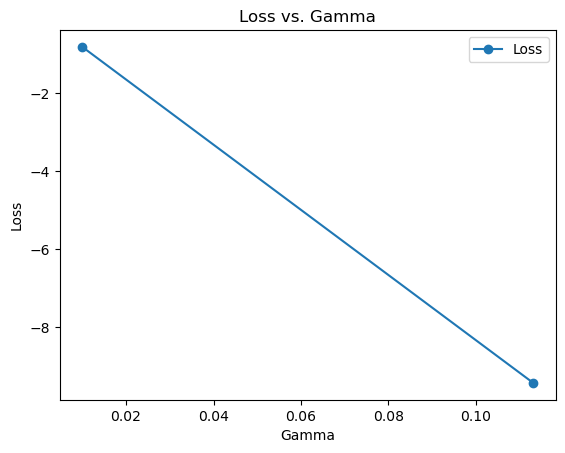

In [55]:
initial_w = np.zeros(tx.shape[1])
max_iters = 100

start_time = datetime.datetime.now()
w =[]
loss = []
for i in range(1,300,10) : 

    w_i, loss_i = logistic_gradient_descent(y, tx, initial_w, gamma=i*0.01,max_iters=max_iters)
    w.append(w_i)
    loss.append(loss_i)

end_time = datetime.datetime.now()
print(f"Execution time {(end_time - start_time).total_seconds()} seconds")
gamma = np.linspace(1, 300, 30)  # Example: gamma values ranging from 0 to 1
gamma = gamma*0.01

plt.plot(gamma, loss, label='Loss', marker='o', linestyle='-')
min_ind = np.argmin(loss)

print(min_ind)
min_gamma = gamma[min_ind]
print(min_gamma)


print(min(loss))
print(loss)
# Add labels and title
plt.xlabel('Gamma')
plt.ylabel('Loss')
plt.title('Loss vs. Gamma')

# Add a legend
plt.legend()

# Show the plot (if you're using a Jupyter Notebook, this step may be optional)
plt.show()

In [24]:
print(tx.T[:][0])
print(tx.shape)

[1. 1. 1. ... 1. 1. 1.]
(229694, 168)


In [45]:
print(gamma)

[0.01 0.12 0.23 0.34 0.45 0.56 0.67 0.78 0.89 1.  ]


In [13]:
initial_w = np.zeros(tx.shape[1])
max_iters = 100
#gamma = min_gamma 

w, loss = logistic_gradient_descent(y,tx,initial_w= np.zeros(tx.shape[1]),gamma=0.5,max_iters=max_iters)

end_time = datetime.datetime.now()
print(loss)

pred [0.5 0.5 0.5 ... 0.5 0.5 0.5]
pred [0.27862656 0.3497902  0.27493253 ... 0.3116496  0.27063626 0.34456127]
pred [0.15141779 0.23969304 0.16274027 ... 0.1863852  0.15720813 0.24087775]
pred [0.08329378 0.16221679 0.0975319  ... 0.11092151 0.09191432 0.16779431]
pred [0.04613458 0.10954505 0.05827871 ... 0.06624043 0.05331608 0.11666194]
pred [0.02562124 0.07412679 0.03465995 ... 0.03972483 0.03065013 0.08123973]
pred [0.01424762 0.05030794 0.02054839 ... 0.02391412 0.01749422 0.05677213]
pred [0.00793211 0.03423364 0.01216453 ... 0.01444394 0.00993361 0.03983263]
pred [0.00442188 0.02334468 0.00719966 ... 0.00874896 0.00562051 0.02805245]
pred [0.00246864 0.01594504 0.00426343 ... 0.00531231 0.00317271 0.01982011]
pred [0.00138024 0.01090436 0.00252706 ... 0.00323222 0.00178834 0.01404113]
pred [0.00077282 0.00746433 0.00149955 ... 0.00196998 0.00100715 0.00996866]
pred [0.0004333  0.00511341 0.00089087 ... 0.00120236 0.00056694 0.00708961]
pred [0.00024323 0.00350506 0.00052986 ..

c:\Users\ricca\OneDrive\Documenti\GitHub\ml-project-1-ker\code\implementations.py:479: RuntimeWarning: divide by zero encountered in log
  pred = sigmoid(tx.dot(w))


### Computation of metrics

We first compute some metrics on the training data (60% of the total data)



In [60]:
pred_data = np.dot(tx,w)

pred_data[pred_data > 0] = 1
pred_data[pred_data < 0] = -1

correctly_classified_data = np.sum(pred_data == y)

tp = np.sum((pred_data == 1) & (y == 1))
fp = np.sum((pred_data == 1) & (y == -1))

tn = np.sum((pred_data == -1) & (y == -1))
fn = np.sum((pred_data == -1) & (y == 1))

accuracy_data = (tp + tn)/(tp + fp + tn + fn)

print(f"Accuracy: {accuracy_data*100}%")
print(f"Precision: {tp/(tp + fp)*100}%")
print(f"Recall : {tp/(tp + fn)*100}%")
print(f"F1-score : {tp/(tp + 0.5*(fn + fp))*100}%")

Accuracy: 90.88482938169913%
Precision: 46.6672753834916%
Recall : 25.293215222447667%
F1-score : 32.80593087069546%


Now we compute some metrics for our test data (40% of the total data)

In [61]:
pred_test = np.dot(tx_test,w)

pred_test[pred_test > 0] = 1
pred_test[pred_test < 0] = -1

correctly_classified_test = np.sum(pred_test == y_test)

tp = np.sum((pred_test == 1) & (y_test == 1))
fp = np.sum((pred_test == 1) & (y_test == -1))

tn = np.sum((pred_test == -1) & (y_test == -1))
fn = np.sum((pred_test == -1) & (y_test == 1))

accuracy_test = (tp + tn)/(tp + fp + tn + fn)

print(f"Accuracy: {accuracy_test*100}%")
print(f"Precision: {tp/(tp + fp)*100}%")
print(f"Recall : {tp/(tp + fn)*100}%")
print(f"F1-score : {tp/(tp + 0.5*(fn + fp))*100}%")

Accuracy: 90.66445891447668%
Precision: 45.58762024257633%
Recall : 24.863138686131386%
F1-score : 32.17712177121771%


### Feature analysis

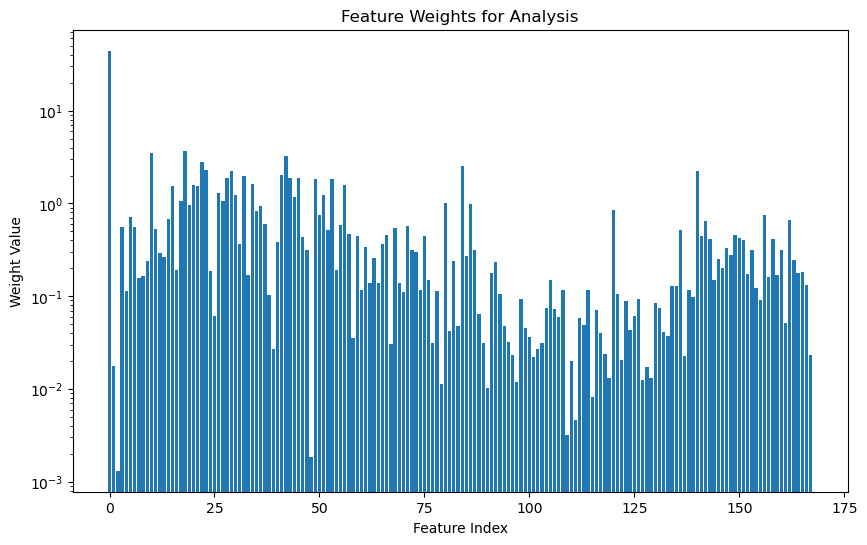

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(w)), np.abs(w))
plt.yscale('log')
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.title('Feature Weights for Analysis')
plt.show()